In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Классификация доходов

# 0.Описать задачу словами

Основная цель данной задачи состоит в том, чтобы классифицировать людей, зарабатывающих <=50 тысяч или >50 тысяч долларов, на основе нескольких объясняющих факторов, влияющих на доход человека, таких как возраст, профессия, образование и т. д.

# 1.Загружаем данные

In [2]:
url = "D:\income_evaluation.csv"
data_raw = pd.read_csv(url)

In [3]:
type(data_raw) 

pandas.core.frame.DataFrame

Посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному человеку) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [4]:
data_raw.shape

(32561, 15)

Посмотрим весь наш набор данных:

In [5]:
data_raw

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Первые строки таблицы:

In [6]:
data_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Последние строки таблицы:

In [7]:
data_raw.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Таблица содержит данные о более 32 тысячах людей с указанием их годового дохода. Для каждого человека указан: его возраст,рабочий класс, образование, семейное положение, род занятий,отношения,раса, пол,прирост капитала, потеря капитала, количество рабочих часов в неделю,родная страна,доход.



Имена столбцов:

In [8]:
data_raw.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [9]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data_raw.columns = col_names

In [10]:
data_raw.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Имена строк (совпадают с номерами):

In [11]:
data_raw.index

RangeIndex(start=0, stop=32561, step=1)

Столбцы (признаки) имеют следующие имена:

- `Age` - возраст человека
- `Workclass` - рабочий класс(тип работодателя.  Будь то правительственные, военные, частные и т. д.)
- `Fnlwgt` – количество людей, которое, по мнению переписчиков, представляет собой наблюдение (окончательный вес)
- `Education` - наивысший уровень образования, достигнутый этим человеком
- `Education-num` - высший уровень образования в числовой форме (количество законченных классов)
- `Marital-status` - семейное положение человека
- `Occupation` - род занятий человека
- `Relationship` - содержит такие значения семейных отношений, как муж, отец и т. д., но только по одному на каждое наблюдение.
- `Race` - описание индивидуальной расы. (Черный, белый и т. д.)
- `Sex` - биологический пол
- `Capital-gain` - зарегистрированный прирост капитала (доход от инвестиционных источников, кроме заработной платы / оклада)
- `Capital-loss` - зарегистрированные капитальные убытки (убытки от источников инвестиций, кроме заработной платы / оклада)
- `Hours-per-week` - количество отработанных часов в неделю
- `Native country` - страна происхождения человека
- `Income` - составляет ли годовой доход человека <= 50 или >50 тыс. долларов.

Признаки `Workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`,`native country` - номинальные (категориальные); `Sex`, `income` - бинарные, а остальные признаки  - количественные(числовые).

# 2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). 

Получим сводную информацию о признаках:

In [12]:
data_raw.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей. По данным характеристикам заметна следующая особенность нашего набора данных. Если сравнить среднее значение и медиану, видно какие значения преобладают в выборке. Если среднее значение больше, чем медиана, значит данный признак принимает чаще меньшие значения, чем большие.

Проверим взаимосвязь между переменными:

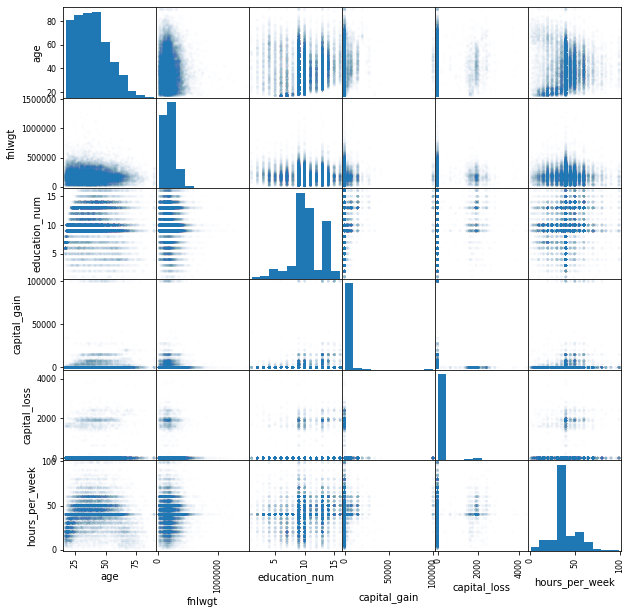

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

In [14]:
data_raw.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Коэффициент кореляции меняется от -1 до 1. Так как у нас нет значений по мудулю близких к 1, значит у нас нет зависимостей близких к линейной. Положительный коээфициент кореляции характеризует линейную зависимость с положительным коэффициентом (т.е чем больше Х, тем больше У). Отрицательный коэффициент наоборот, чем меньше Х, тем меньше У.

Посмотрим зависимость количества отработанных часов от возраста:

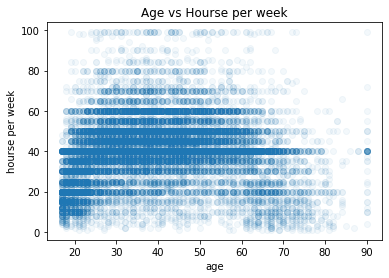

In [15]:
plt.plot(data_raw['age'], data_raw['hours_per_week'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('hourse per week')
plt.title('Age vs Hourse per week')
pass

In [16]:
data_raw['income'] == ' <=50K'

0         True
1         True
2         True
3         True
4         True
         ...  
32556     True
32557    False
32558     True
32559     True
32560    False
Name: income, Length: 32561, dtype: bool

Посмотрим зависимость уровня дохода от количества законченных классов и возраста:

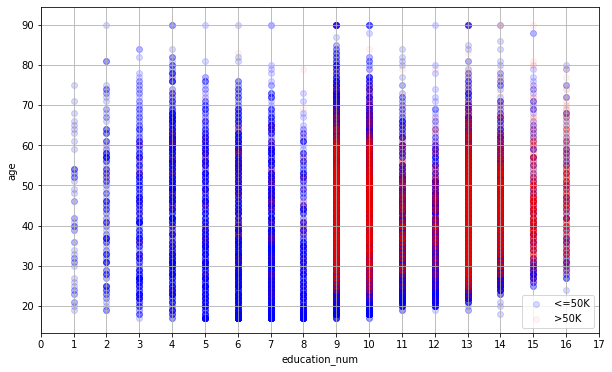

In [17]:
plt.figure(figsize = (10, 6))

plt.scatter(data_raw[data_raw['income'] == ' <=50K']['education_num'],
            data_raw[data_raw['income'] == ' <=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(data_raw[data_raw['income'] == ' >50K']['education_num'],
            data_raw[data_raw['income'] == ' >50K']['age'],
            alpha = 0.05,
            label = '>50K',
            color = 'r')

plt.xlabel('education_num')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('age')
plt.legend()
plt.grid()

Проанализируем зависимость возраста людей по количеству законченных классов:

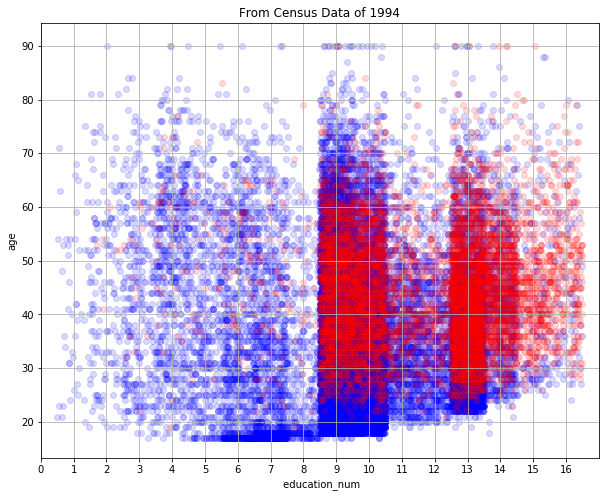

In [18]:
np.random.seed(0)
education_num_rnd = data_raw['education_num'] + np.random.rand(data_raw.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data_raw['income'] == ' <=50K'],
            data_raw[data_raw['income'] == ' <=50K']['age'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.scatter(education_num_rnd[data_raw['income'] == ' >50K'],
            data_raw[data_raw['income'] == ' >50K']['age'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.xlabel(' education_num')
plt.xticks(range(17))
plt.xlim(0, 17)
plt.ylabel('age')
plt.title('From Census Data of 1994')
plt.grid()

По представленному графику зависимости видно следующее:большинство людей заканчивало 9,10,13 классов.

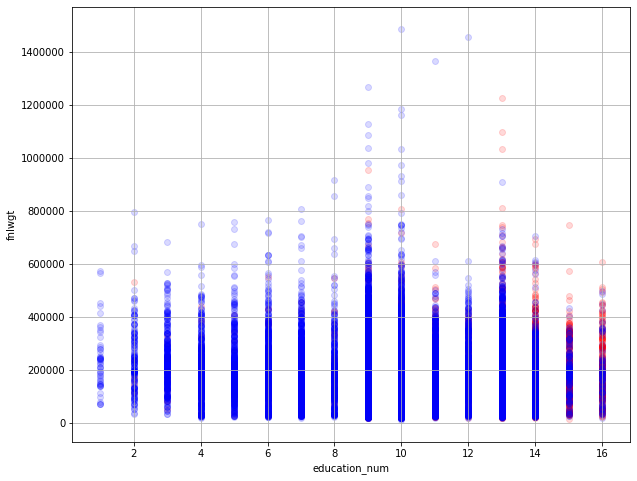

In [19]:
plt.figure(figsize = (10, 8))

plt.scatter(data_raw[data_raw['income'] == ' >50K']['education_num'],
            data_raw[data_raw['income'] == ' >50K']['fnlwgt'],
            alpha = 0.15,
            label = '>50K',
            color = 'r')

plt.scatter(data_raw[data_raw['income'] == ' <=50K']['education_num'],
            data_raw[data_raw['income'] == ' <=50K']['fnlwgt'],
            alpha = 0.15,
            label = '<=50K',
            color = 'b')

plt.xlabel('education_num')
plt.ylabel('fnlwgt')
plt.grid()

In [20]:
data_raw.describe(include = ['object'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [21]:
data_raw.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [22]:
data_raw['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [23]:
data_raw['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [24]:
for name in data_raw['education'].unique():
    print(name, data_raw['education_num'][data_raw['education'] == name].iloc[0])

 Bachelors 13
 HS-grad 9
 11th 7
 Masters 14
 9th 5
 Some-college 10
 Assoc-acdm 12
 Assoc-voc 11
 7th-8th 4
 Doctorate 16
 Prof-school 15
 5th-6th 3
 10th 6
 1st-4th 2
 Preschool 1
 12th 8


In [25]:
data_raw['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [26]:
data_raw = data_raw.drop('capital_gain', axis = 1)\
            .drop('capital_loss', axis = 1)\
           .drop('education',    axis = 1)\
           .drop('native_country', axis = 1).drop('fnlwgt', axis = 1)

In [27]:
data_raw['workclass'].dtype.name

'object'

In [28]:
data_raw['education_num'].dtype.name

'int64'

Посмотрим на категориальные и количественные признаки:

In [29]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'income']
['age', 'education_num', 'hours_per_week']


In [30]:
for c in categorical_columns:
    print(c, data_raw[c].unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
marital_status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
income [' <=50K' ' >50K']


# 3. Обработать пропущенные значения (или убедиться, что их нет)

Найдём медиану по каждому признаку:

In [31]:
data_raw.median(axis = 0)

age               37.0
education_num     10.0
hours_per_week    40.0
dtype: float64

Заменим пропущенные значения на медианы:

In [32]:
data_raw = data_raw.fillna(data_raw.median(axis = 0), axis = 0)

In [33]:
data_raw[numerical_columns].count(axis = 0)

age               32561
education_num     32561
hours_per_week    32561
dtype: int64

In [34]:
data_raw[categorical_columns].count(axis = 0)

workclass         32561
marital_status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
income            32561
dtype: int64

In [35]:
data_raw['workclass'].describe()

count        32561
unique           9
top        Private
freq         22696
Name: workclass, dtype: object

In [36]:
data_raw.loc[data_raw.workclass == " ?", 'workclass'] = None

In [37]:
data_raw.describe(include = [object])

,workclass,marital_status,occupation,relationship,race,sex,income
count,30725,32561,32561,32561,32561,32561,32561
unique,8,7,15,6,5,2,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K
freq,22696,14976,4140,13193,27816,21790,24720


In [38]:
type(data_raw['workclass'].describe())

pandas.core.series.Series

In [39]:
data_raw['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', None, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [40]:
data_raw['workclass'].describe().top

' Private'

In [41]:
data_raw['workclass'] = data_raw['workclass'].fillna(' Private')

In [42]:
data_raw.describe(include = [object])

,workclass,marital_status,occupation,relationship,race,sex,income
count,32561,32561,32561,32561,32561,32561,32561
unique,8,7,15,6,5,2,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K
freq,24532,14976,4140,13193,27816,21790,24720


In [43]:
data_describe = data_raw.describe(include = [object])
for c in categorical_columns:
    data_raw[c] = data_raw[c].fillna(data_describe[c]['top'])

In [44]:
data_raw.describe(include = [object])

,workclass,marital_status,occupation,relationship,race,sex,income
count,32561,32561,32561,32561,32561,32561,32561
unique,8,7,15,6,5,2,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K
freq,24532,14976,4140,13193,27816,21790,24720


# 4. Обработать категориальные признаки

Применим метод векторизации:

In [45]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'income'] ['workclass', 'marital_status', 'occupation', 'relationship', 'race']


In [47]:
data_raw['sex'].unique()

array([' Male', ' Female'], dtype=object)

Заменим в бинарном признаке `sex` значения "Male", "Female" на 0 и 1.

In [49]:
data_raw.at[data_raw['sex'] == ' Male', 'sex'] = 0
data_raw.at[data_raw['sex'] == ' Female', 'sex'] = 1
data_raw['sex'].describe()

count    32561.000000
mean         0.330795
std          0.470506
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

Применим метод векторизации к небинарному признаку `race`

In [51]:
data_raw['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

Заменяем признак `race` на 5 признаков соответственно с помощью метода `get_dummies`из  pandas:

In [54]:
data_raw[nonbinary_columns]

,workclass,marital_status,occupation,relationship,race
0,State-gov,Never-married,Adm-clerical,Not-in-family,White
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White
2,Private,Divorced,Handlers-cleaners,Not-in-family,White
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black
...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White
32558,Private,Widowed,Adm-clerical,Unmarried,White
32559,Private,Never-married,Adm-clerical,Own-child,White


In [56]:
data_nonbinary = pd.get_dummies(data_raw[nonbinary_columns])
print(data_nonbinary.columns)

Index(['workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Hu

In [57]:
len(data_nonbinary.columns)

41

# 5. Провести нормализацию 

В случае, когда входные данные нормализованы, алгоритмы машинного обучения работают качественнее. Если мы приведём наши данные к нулевому среднему значению с единичным квадратичным отклонением, то получим отмасштабированные данные.

In [58]:
data_numerical = data_raw[numerical_columns]
data_numerical.describe()

,age,education_num,hours_per_week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [59]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [60]:
data_numerical.describe()

,age,education_num,hours_per_week
count,3.256100e+04,3.256100e+04,3.256100e+04
mean,-2.549411e-17,2.539659e-16,-1.323354e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.582182e+00,-3.529602e+00,-3.193981e+00
25%,-7.757560e-01,-4.200532e-01,-3.542890e-02
50%,-1.159528e-01,-3.135955e-02,-3.542890e-02
75%,6.904732e-01,7.460277e-01,3.695137e-01
max,3.769554e+00,2.300802e+00,4.742894e+00


In [63]:
data_raw = pd.concat((data_numerical, data_nonbinary, data_raw[binary_columns]), axis = 1)
print(data_raw.shape)

(32561, 46)


# 6. Разбить данные на обучающую и тестовую выборки

Выбрасываем столбец `income`

In [79]:
X = data_raw.drop('income', axis = 1)
y = data_raw['income']
feature_names = X.columns

In [80]:
type(feature_names)

pandas.core.indexes.base.Index

In [81]:
feature_names

Index(['age', 'education_num', 'hours_per_week', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupa

In [82]:
print(X.shape)
print(y.shape)
N, d = X.shape

(32561, 45)
(32561,)


In [83]:
type(X)

pandas.core.frame.DataFrame

In [84]:
type(y)

pandas.core.series.Series

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Количество обучающих и тестовых данных =  ' + str(N_train) + ' и ' + str(N_test))

Количество обучающих и тестовых данных =  22792 и 9769


# 7. Запустить классификатор ближайших соседей 

In [92]:
from sklearn.neighbors import KNeighborsClassifier

num_neigh = [5, 10, 15, 20]
y_train_predict = []
y_test_predict = []
for i in range(4):
    knn = KNeighborsClassifier(n_neighbors = num_neigh[i])
    knn.fit(X_train, list(y_train))
    y_train_predict.append(knn.predict(X_train))
    y_test_predict.append(knn.predict(X_test))

In [87]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

# 8.  Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы

In [94]:
err_train = []
err_test = []
for i in range(4):
    err_train.append(np.mean(y_train != y_train_predict[i]))
    err_test.append(np.mean(y_test  != y_test_predict[i]))
    print('При k =  ' + str(num_neigh[i]) + ' ошибка на тренировочном и тестовом наборе = ' \
          + str(err_train[i]) + ' и ' + str(err_test[i]))

При k =  5 ошибка на тренировочном и тестовом наборе = 0.12903650403650405 и 0.18108301770907975
При k =  10 ошибка на тренировочном и тестовом наборе = 0.14268164268164268 и 0.17146074316716142
При k =  15 ошибка на тренировочном и тестовом наборе = 0.1479027729027729 и 0.16644487665062954
При k =  20 ошибка на тренировочном и тестовом наборе = 0.1507985257985258 и 0.16531886579997954


Ниже представлена матрица ошибок для k=20

In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(list(y_test), y_test_predict[2]))

[[6772  683]
 [ 943 1371]]


Нетрудно заметить следующий факт: при увеличении k ошибка на тренировочном наборе увеличивается, а на тестовом уменьшается. Данный факт может быть объяснен тем, что в тестовом наборе данных меньше, поэтому верно их классифицировать алгоритму проще, нежеле при работе на обучающем наборе с большим количеством данных.